In [1]:
import pandas as pd
import xlrd
import numpy as np # è un modulo che estende Python con strutture dati e metodi utili per il calcolo tecnico-scientifico
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 15] # Cambio le impostazioni di default della largehzza e altezza dei grafici
import matplotlib as mp
# widget packages
import ipywidgets as widgets
from ipywidgets import interact, interact_manual, GridspecLayout, Button, Layout, IntSlider, HBox, Label
from ipywidgets.embed import embed_minimal_html
from IPython.display import display, Markdown, clear_output
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

In [3]:
filename='F:\MMDA\MMDA\Controllo ST20\ST20_Rif203112_No_Crom.xlsx'
workbook=xlrd.open_workbook(filename)
sheet = workbook.sheet_by_index(0)
nome_righe=sheet.col_values(0)[0:7]
nome_righe=sheet.col_values(0)[0:7]
Tag_descrizione=[]
for i in range(7):
    Tag_descrizione.append(sheet.row_values(i)[1:])
Tag_descrizione=pd.DataFrame(Tag_descrizione,index=nome_righe)
Dati_modello=pd.read_excel(filename,header=0,usecols=range(0,72),skiprows=6,index_col=0)
Dati_modello.columns=list(Tag_descrizione.loc['TAG'][:-2])
Dati_modello.index.name='Date'
Dati_modello['Year'] = Dati_modello.index.strftime('%Y')
Dati_modello=Dati_modello.apply(pd.to_numeric, errors='coerce') #Trasformo tutti i dati in numeri e i valori non numerici in NaN

**Menu a tendina per selezione di Tag, Range Tag e Range Date**

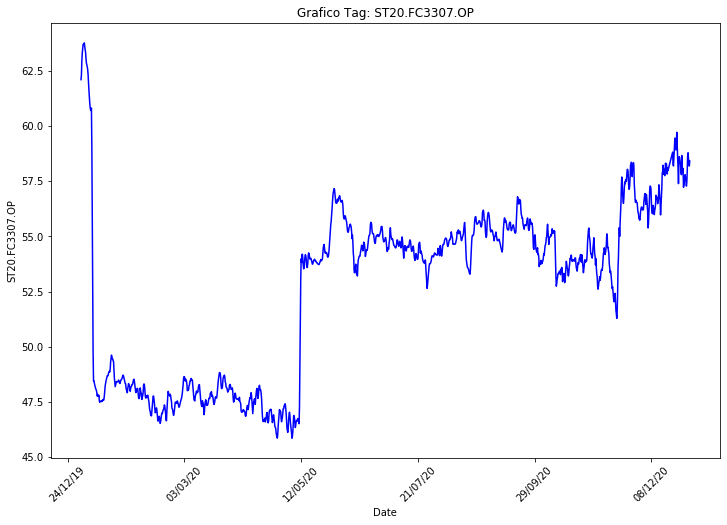

In [4]:
features = list(Dati_modello.columns)[1:len(Dati_modello.columns)-1] # (X = Variabili)

Tag = widgets.Dropdown(
    options=list(features),
    description='Number:',
    disabled=False)

range_Tag = widgets.FloatRangeSlider(
        value=[Dati_modello[Tag.value].min(),Dati_modello[Tag.value].max()],
        max=Dati_modello[Tag.value].max(),
        min=Dati_modello[Tag.value].min(),
        step=(Dati_modello[Tag.value].max()-Dati_modello[Tag.value].min())/20,
        description='Range Tag:',
        orientation='horizontal',
        readout=True,
        readout_format='d',)
dates = list(pd.date_range(Dati_modello.index.min(), Dati_modello.index.max(), freq='D'))
options = [(i.strftime('%d/%m/%Y'), i) for i in dates]
index = (0, len(dates)-1)
range_Date = widgets.SelectionRangeSlider(
    options=options,
    index=index,
    description='Range Date:',
    disabled=False,
    orientation = 'horizontal',
        layout={'width': '500px'},)
    
# Button to display info about user
buttonuser_info = widgets.Button(description='Plot Tag Graph')
outuser_info = widgets.Output()

def on_buttonuser_info_clicked(x):
    clear_output()
    display(widgets.VBox([Tag, range_Tag, range_Date, buttonuser_info, outuser_info]))    
    
    fig, ax = plt.subplots(figsize=(12, 8))
    ax.plot(Dati_modello.index[(Dati_modello[Tag.value] >= range_Tag.value[0]) &
                               (Dati_modello[Tag.value] <= range_Tag.value[1]) &
                               (Dati_modello.index >= range_Date.value[0]) &
                               (Dati_modello.index <= range_Date.value[1])].values,
             Dati_modello[[Tag.value]][(Dati_modello[Tag.value] >= range_Tag.value[0]) &
                                       (Dati_modello[Tag.value] <= range_Tag.value[1]) &
                                       (Dati_modello.index >= range_Date.value[0]) &
                                       (Dati_modello.index <= range_Date.value[1])].values,
             c = 'b')
    ax.set(xlabel="Date", ylabel=str(Tag.value),
           title='Grafico Tag: {}'.format(Tag.value))
    # Format the x axis
    ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=10))
    ax.xaxis.set_major_formatter(DateFormatter("%d/%m/%y"))
    plt.xticks(rotation=45)
    plt.show()
    
# Links button: buttonuser_info to its output function      
buttonuser_info.on_click(on_buttonuser_info_clicked)

# Display
display(widgets.VBox([Tag, range_Tag, range_Date, buttonuser_info, outuser_info]))


def on_dropdown_change(change):
    if change['name'] == 'value' and (change['new'] != change['old']):
        clear_output()
        range_Tag_2 = widgets.FloatRangeSlider(
                value=[Dati_modello[Tag.value].min(),Dati_modello[Tag.value].max()],
                max=Dati_modello[Tag.value].max(),
                min=Dati_modello[Tag.value].min(),
                step=(Dati_modello[Tag.value].max()-Dati_modello[Tag.value].min())/20,
                description='Range Tag:',
                orientation='horizontal',
                readout=True,
                readout_format='d',)
        range_Tag = range_Tag_2
        range_Date_2 = widgets.SelectionRangeSlider(
                options=options,
                index=index,
                description='Range Date:',
                disabled=False,
                orientation = 'horizontal',
                layout={'width': '500px'},)
        range_Date = range_Date_2
        def on_buttonuser_info_clicked_2(x):
            clear_output()
            display(widgets.VBox([Tag, range_Tag, range_Date, buttonuser_info, outuser_info]))    

            fig, ax = plt.subplots(figsize=(12, 8))
            ax.plot(Dati_modello.index[(Dati_modello[Tag.value] >= range_Tag.value[0]) &
                                       (Dati_modello[Tag.value] <= range_Tag.value[1]) &
                                       (Dati_modello.index >= range_Date.value[0]) &
                                       (Dati_modello.index <= range_Date.value[1])].values,
                     Dati_modello[[Tag.value]][(Dati_modello[Tag.value] >= range_Tag.value[0]) &
                                               (Dati_modello[Tag.value] <= range_Tag.value[1]) &
                                               (Dati_modello.index >= range_Date.value[0]) &
                                               (Dati_modello.index <= range_Date.value[1])].values,
                     c = 'b')
            ax.set(xlabel="Date", ylabel=str(Tag.value),
                   title='Grafico Tag: {}'.format(Tag.value))
            # Format the x axis
            ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=10))
            ax.xaxis.set_major_formatter(DateFormatter("%d/%m/%y"))
            plt.xticks(rotation=45)
            plt.show()
        buttonuser_info.on_click(on_buttonuser_info_clicked_2)
        display(widgets.VBox([Tag, range_Tag, range_Date, buttonuser_info, outuser_info]))
Tag.observe(on_dropdown_change)